In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [10]:
# load data
data = pd.read_csv("abalone.csv")
data.head() 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
data['Sex'].replace(['F', 'M', 'I'], [0, 1, 2], inplace=True)
data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_30116\931092579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sex'].replace(['F', 'M', 'I'], [0, 1, 2], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_30116\931092579.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'].repl

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
Length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [13]:
data = data.drop(["Sex"], axis=1)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


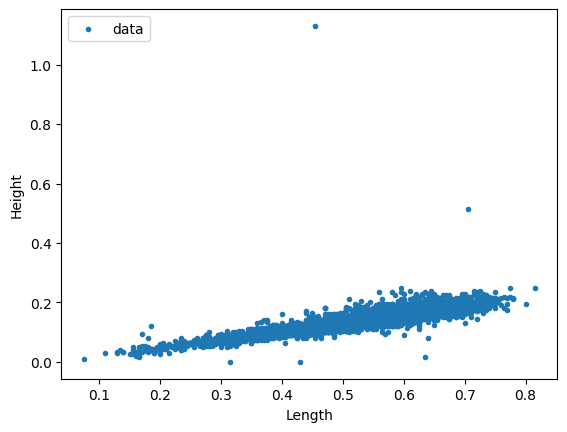

In [14]:
plt.scatter(data['Length'], data['Height'], marker='.')
plt.xlabel('Length')
plt.ylabel('Height')
plt.legend(['data'], loc='upper left')
plt.show()

In [15]:
X = np.array(data['Length'])
Y = np.array(data['Height'])

print(X.shape)
print(Y.shape)

(4177,)
(4177,)


In [16]:
X = np.array(data[['Length']])
Y = np.array(data[['Height']])

print(X.shape)
print(Y.shape)

(4177, 1)
(4177, 1)


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3132, 1)
(3132, 1)
(1045, 1)
(1045, 1)


LLS (Linear Least Squares):

In [18]:
from lls import LinearLeastSquares

In [19]:
lls = LinearLeastSquares()

lls.fit(X_train, Y_train)

Y_pred = lls.predict(X_test)

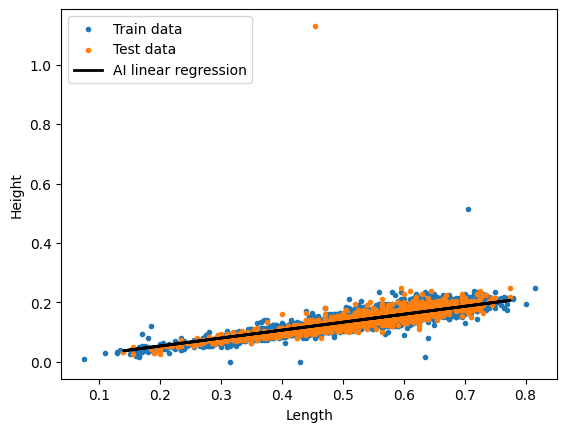

In [20]:
plt.scatter(X_train, Y_train, marker='.')
plt.scatter(X_test, Y_test, marker='.')
plt.plot(X_test, Y_pred, color='black', lw=2)

plt.xlabel('Length')
plt.ylabel('Height')
plt.legend(['Train data', 'Test data', 'AI linear regression'], loc='upper left')
plt.show()

In [21]:
lls.evaluate(X_test, Y_test, "mae")

0.013893666006908981

Evaluation method in "classification" vs "regression" :

In [22]:
# classification

Y_test = np.array([2, 3, 4, 5, 3, 1])
Y_pred = np.array([2, 1, 4, 4, 5, 1])

# accuracy - دقت
np.sum(Y_test == Y_pred) / len(Y_test)

0.5

In [23]:
# regression

Y_test = np.array([210, 330, 400, 500, 300, 199])
Y_pred = np.array([200, 300, 440, 500, 300, 200])

# error or loss - خطا

# mean abs error (MAE)
mae = np.sum(np.abs(Y_test - Y_pred)) / len(Y_test)
print(mae)

# mean square error (MSE)
mse = np.sum((Y_test - Y_pred)**2) / len(Y_test)
print(mse)

13.5
433.5
